In [1]:
import os
import numpy as np
import pandas as pd
import swifter
from sklearn.model_selection import train_test_split
import utils
import catboost
import scoring
import seaborn as sns
import pickle
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
import pylab as pl
from IPython import display
%matplotlib inline
from sklearn.model_selection import StratifiedKFold, KFold

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

In [4]:
DATA_PATH = "./data"

In [5]:
dtypes = {'id': 'int32',
 'ncl[0]': 'int32',
 'ncl[1]': 'int32',
 'ncl[2]': 'int32',
 'ncl[3]': 'int32',
 'avg_cs[0]': 'float32',
 'avg_cs[1]': 'float32',
 'avg_cs[2]': 'float32',
 'avg_cs[3]': 'float32',
 'ndof': 'int8',
 'MatchedHit_TYPE[0]': 'int8',
 'MatchedHit_TYPE[1]': 'int8',
 'MatchedHit_TYPE[2]': 'int8',
 'MatchedHit_TYPE[3]': 'int8',
 'MatchedHit_X[0]': 'float32',
 'MatchedHit_X[1]': 'float32',
 'MatchedHit_X[2]': 'float32',
 'MatchedHit_X[3]': 'float32',
 'MatchedHit_Y[0]': 'float32',
 'MatchedHit_Y[1]': 'float32',
 'MatchedHit_Y[2]': 'float32',
 'MatchedHit_Y[3]': 'float32',
 'MatchedHit_Z[0]': 'float32',
 'MatchedHit_Z[1]': 'float32',
 'MatchedHit_Z[2]': 'float32',
 'MatchedHit_Z[3]': 'float32',
 'MatchedHit_DX[0]': 'float32',
 'MatchedHit_DX[1]': 'float32',
 'MatchedHit_DX[2]': 'float32',
 'MatchedHit_DX[3]': 'float32',
 'MatchedHit_DY[0]': 'float32',
 'MatchedHit_DY[1]': 'float32',
 'MatchedHit_DY[2]': 'float32',
 'MatchedHit_DY[3]': 'float32',
 'MatchedHit_DZ[0]': 'float32',
 'MatchedHit_DZ[1]': 'float32',
 'MatchedHit_DZ[2]': 'float32',
 'MatchedHit_DZ[3]': 'float32',
 'MatchedHit_T[0]': 'int8',
 'MatchedHit_T[1]': 'int8',
 'MatchedHit_T[2]': 'int8',
 'MatchedHit_T[3]': 'int8',
 'MatchedHit_DT[0]': 'int16',
 'MatchedHit_DT[1]': 'int16',
 'MatchedHit_DT[2]': 'int16',
 'MatchedHit_DT[3]': 'int16',
 'Lextra_X[0]': 'float32',
 'Lextra_X[1]': 'float32',
 'Lextra_X[2]': 'float32',
 'Lextra_X[3]': 'float32',
 'Lextra_Y[0]': 'float32',
 'Lextra_Y[1]': 'float32',
 'Lextra_Y[2]': 'float32',
 'Lextra_Y[3]': 'float32',
 'NShared': 'int32',
 'Mextra_DX2[0]': 'float32',
 'Mextra_DX2[1]': 'float32',
 'Mextra_DX2[2]': 'float32',
 'Mextra_DX2[3]': 'float32',
 'Mextra_DY2[0]': 'float32',
 'Mextra_DY2[1]': 'float32',
 'Mextra_DY2[2]': 'float32',
 'Mextra_DY2[3]': 'float32',
 'FOI_hits_N': 'int32',
 'FOI_hits_X': 'object',
 'FOI_hits_Y': 'object',
 'FOI_hits_Z': 'object',
 'FOI_hits_DX': 'object',
 'FOI_hits_DY': 'object',
 'FOI_hits_DZ': 'object',
 'FOI_hits_T': 'object',
 'FOI_hits_DT': 'object',
 'FOI_hits_S': 'object',
 'PT': 'float64',
 'P': 'float64',
 'sWeight': 'float64',
 'particle_type': 'int8',
 'label': 'int8',
 'kinWeight': 'float64',
 'weight': 'float64'}

In [6]:
val_split_index = 2000000

In [7]:
val_split_index = 2722852

In [6]:
val_split_index = 4800000

## test part open

In [6]:
full_train = pd.read_csv("data/test_public_v2.csv", dtype=dtypes, index_col='id')

In [7]:
closest_hits_features = pd.read_csv('more_features_fixed_test.csv',dtype=np.float32)

In [8]:
train_concat = pd.concat(
    [full_train.loc[:, utils.SIMPLE_FEATURE_COLUMNS],
     closest_hits_features], axis=1)

In [6]:
full_train = pd.read_csv("data/test_private_v3_track_1.csv", dtype=dtypes, index_col='id')

/home/antikov/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [7]:
closest_hits_features = pd.read_csv('more_features_fixed_test_private.csv',dtype=np.float32)

In [8]:
train_concat = pd.concat(
    [full_train.loc[:, utils.SIMPLE_FEATURE_COLUMNS],
     closest_hits_features], axis=1)

## part 1

In [6]:
full_train = pd.read_csv("data/train_part_1_v2.csv", dtype=dtypes, index_col='id')

/home/antikov/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [7]:
closest_hits_features = pd.read_csv('more_features_fixed.csv',dtype=np.float32)

In [8]:
train_concat = pd.concat(
    [full_train.loc[:, utils.SIMPLE_FEATURE_COLUMNS],
     closest_hits_features], axis=1)

## part 2

In [9]:
full_train2 = pd.read_csv("data/train_part_2_v2.csv", dtype=dtypes, index_col='id')

/home/antikov/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [10]:
closest_hits_features2 = pd.read_csv('more_features_fixed_2.csv',dtype=np.float32)

In [11]:
#fix indexes
a = closest_hits_features2.index.tolist()
a = list(np.array(a) + 2722852)
closest_hits_features2.index = a

In [12]:
train_concat2 = pd.concat(
    [full_train2.loc[:, utils.SIMPLE_FEATURE_COLUMNS],
     closest_hits_features2], axis=1)

## concat train data

In [13]:
train_concat = pd.concat([train_concat, train_concat2], axis=0)

In [14]:
train_concat.shape

(5445705, 89)

In [15]:
#train_concat.to_csv('full_train.csv',index=False)

## generate more_feature files

In [9]:
def wrapper(text):
    return np.array(text[1:-1].strip().split(), dtype=np.int8)

In [10]:
columns = ['FOI_hits_S', 'FOI_hits_T','FOI_hits_DT']
for column in columns:
    full_train[column] = full_train[column].apply(wrapper)

In [11]:
def wrapper(text):
    return np.array(text[1:-1].strip().split(), dtype=np.float32)

In [12]:
columns = ['FOI_hits_X', 'FOI_hits_Y','FOI_hits_Z','FOI_hits_DX','FOI_hits_DY','FOI_hits_DZ']
for column in columns:
    full_train[column] = full_train[column].apply(wrapper)

In [14]:
# This will take a while... We welcome your solutions on fast processing of jagged arrays
closest_hits_features = full_train.swifter.apply(
    utils.find_closest_hit_per_station, result_type="expand", axis=1)

Pandas Apply: 100%|██████████| 1452188/1452188 [25:30<00:00, 948.67it/s] 


In [15]:
closest_hits_features.to_csv('more_features_fixed_test_private.csv',index=False)

## lightgbm

In [14]:
import lightgbm as lgbm

In [222]:
for estim in [100,125,150,175,200,225,250,275,300]:
    model = lgbm.LGBMClassifier(random_state=17,max_depth=5,n_estimators=estim)
    columns = list(set(train_concat.columns)-set(cols))
    model.fit(train_concat.loc[:val_split_index,columns], labels[:val_split_index+1], sample_weight=weights[:val_split_index+1])
    validation_predictions = model.predict_proba(train_concat.loc[val_split_index:,columns].values)[:, 1]
    print(estim,scoring.rejection90(labels[val_split_index:].values, validation_predictions, sample_weight=weights[val_split_index:].values))

100 0.7300089784499552
125 0.7324218929352365
150 0.7316046546768393
175 0.7324685071762477
200 0.729174434271028
225 0.7324549544331396
250 0.7297205924555581
275 0.730495005062234
300 0.732495931627751


In [227]:
model = lgbm.LGBMClassifier(random_state=17,max_depth=5,n_estimators=150)

In [64]:
model.fit(train_concat.loc[:val_split_index], labels[:val_split_index+1], sample_weight=weights[:val_split_index+1])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=5,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=17, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [65]:
#check overfit train
validation_predictions = model.predict_proba(train_concat.loc[:val_split_index].values)[:, 1]
scoring.rejection90(labels[:val_split_index+1].values, validation_predictions, sample_weight=weights[:val_split_index+1].values)

0.7849300183421705

In [66]:
#validation metric accuracy
validation_predictions = model.predict_proba(train_concat.loc[val_split_index:].values)[:, 1]
scoring.rejection90(labels[val_split_index:].values, validation_predictions, sample_weight=weights[val_split_index:].values)

0.7218362199379392

## additional features

In [22]:
train_concat['d2'] = 0
for i in range(8):
    train_concat['d2'] += train_concat[f'{i}'] / train_concat[f'{16+i}']**2

In [29]:
train_concat['n'] = sum([train_concat['0'] != 1000 , (train_concat['1'] != 1000) , (train_concat['2'] != 1000), (train_concat['3'] != 1000)])

In [30]:
train_concat['d2'] = train_concat['d2'] / train_concat['n']

In [9]:
for i in range(4):
    train_concat[f'plastina_{i}'] = np.sqrt(train_concat[f'MatchedHit_X[{i}]'] ** 2 + train_concat[f'MatchedHit_Y[{i}]'] ** 2 + train_concat[f'MatchedHit_Z[{i}]']**2)

In [10]:
for i in range(4):
    train_concat.loc[(train_concat[f'MatchedHit_X[{i}]']==-9999)|(train_concat[f'MatchedHit_Y[{i}]']==-9999)|(train_concat[f'MatchedHit_Z[{i}]']==-9999),f'plastina_{i}'] = -9999

In [32]:
z = [15270, 16470, 17670, 18870]
for i in range(4):
    train_concat[f'approx_{i}'] = np.sqrt(train_concat[f'Lextra_X[{i}]'] ** 2 + train_concat[f'Lextra_Y[{i}]']**2 + z[i])

In [33]:
for i in range(4):
    train_concat.loc[(train_concat[f'Lextra_X[{i}]']==-9999)|(train_concat[f'Lextra_Y[{i}]']==-9999),f'approx_{i}'] = -9999

In [11]:
columns = [str(i) for i in range(24)]
train_concat.drop(columns=columns,inplace=True)

In [11]:
for i in range(8):
    train_concat[f'arr_{i}'] = train_concat[f'{i}'] / train_concat[f'{16+i}']**2

In [12]:
train_concat.head(5)

ncl[0]  ncl[1]  ncl[2]  ncl[3]  avg_cs[0]  avg_cs[1]  avg_cs[2]  \
id                                                                    
0       55      12      10      15   2.127273   1.166667   1.500000   
1       43      18      12      15   2.697675   1.111111   1.333333   
2       90      34      19      29   1.800000   2.058824   1.210526   
3      141      43      15      16   4.609929   2.744186   1.466667   
4       22      18       8       9   1.636364   2.444444   1.000000   

    avg_cs[3]  ndof  MatchedHit_TYPE[0]  MatchedHit_TYPE[1]  \
id                                                            
0    1.600000     8                   2                   2   
1    1.600000     8                   2                   2   
2    1.344828     8                   2                   2   
3    1.125000     8                   2                   2   
4    1.555556     8                   2                   2   

    MatchedHit_TYPE[2]  MatchedHit_TYPE[3]  MatchedHit_X[0]  MatchedHit_X[1]  \
id                                                                             
0                    2                   2       -22.330000        13.760000   
1                    2                   2     -1070.454956     -1156.074951   
2                    2                   2     -3348.080078     -3614.300049   
3                    1                   2      -213.621674      -238.308334   
4                    1                   1      -446.338348      -496.341675   

    MatchedHit_X[2]  MatchedHit_X[3]  MatchedHit_Y[0]  MatchedHit_Y[1]  \
id                                                                       
0         60.000000        65.720001     -1849.337280     -1833.796753   
1      -1202.869995     -1286.069946      -222.241562      -240.826569   
2      -3848.969971     -4113.169922     -1628.132446     -1758.316772   
3       -258.336670      -293.369995       483.453857       520.718506   
4       -550.003357      -588.403320       264.652802       284.417542   

    MatchedHit_Y[2]  MatchedHit_Y[3]  MatchedHit_Z[0]  MatchedHit_Z[1]  \
id                                                                       
0      -1968.072754     -2102.563965     15396.441406     16404.695312   
1       -258.190521      -274.019592     15117.298828     16321.431641   
2      -1887.179932     -2014.608276     15112.236328     16315.967773   
3        559.304199       663.870544     15119.839844     16324.173828   
4        305.503326       328.024017     15203.052734     16407.324219   

    MatchedHit_Z[2]  MatchedHit_Z[3]  MatchedHit_DX[0]  MatchedHit_DX[1]  \
id                                                                         
0      17597.812500     18806.228516         12.750000         13.750000   
1      17514.169922     18722.212891          6.375000          6.875000   
2      17508.302734     18715.945312         25.500000         27.500000   
3      17517.113281     18926.591797          3.208333          3.458333   
4      17600.199219     18808.380859          3.208333          3.458333   

    MatchedHit_DX[2]  MatchedHit_DX[3]  MatchedHit_DY[0]  MatchedHit_DY[1]  \
id                                                                           
0          59.000000         63.000000         63.078957         68.078926   
1          29.500000         31.500000         31.479162         33.979145   
2         118.000000        126.000000        126.278549        136.278488   
3          14.833333         31.500000         15.679264         16.929256   
4          14.833333         15.833333         15.679264         16.929256   

    MatchedHit_DY[2]  MatchedHit_DY[3]  MatchedHit_DZ[0]  MatchedHit_DZ[1]  \
id                                                                           
0          73.078896         78.078857         33.727364         33.745369   
1          36.479130         38.979115         33.613575         33.622578   
2         146.278412        156.278351         33.954948         33.99095

In [25]:
train_concat.head(5)

ncl[0]  ncl[1]  ncl[2]  ncl[3]  avg_cs[0]  avg_cs[1]  avg_cs[2]  \
id                                                                    
0       47      31      13      15   2.000000   1.580645   1.153846   
1       92      19      11      26   2.750000   2.789474   1.363636   
2      100      21      11      12   2.930000   2.428571   1.181818   
3       74      27      13      20   3.067568   2.518518   1.923077   
4       18      22       8       8   1.833333   1.954545   1.125000   

    avg_cs[3]  ndof  MatchedHit_TYPE[0]  MatchedHit_TYPE[1]  \
id                                                            
0    1.133333     8                   2                   2   
1    1.230769     8                   2                   2   
2    1.083333     8                   2                   2   
3    1.300000     8                   2                   2   
4    1.750000     8                   2                   2   

    MatchedHit_TYPE[2]  MatchedHit_TYPE[3]  MatchedHit_X[0]  MatchedHit_X[1]  \
id                                                                             
0                    2                   2     -2685.080078     -2954.300049   
1                    2                   1       739.549988       852.510010   
2                    2                   2     -1595.130005     -1748.449951   
3                    2                   2     -1708.829102     -1816.949951   
4                    2                   2     -1504.630005     -1651.949951   

    MatchedHit_X[2]  MatchedHit_X[3]  MatchedHit_Y[0]  MatchedHit_Y[1]  \
id                                                                       
0      -3140.969971     -3609.169922      1373.348145      1481.262207   
1        827.000000       758.719971      2387.722168      2575.974609   
2      -1933.969971     -2066.669922      -318.644745      -344.529694   
3      -1933.969971     -2066.669922      -191.404434      -207.129272   
4      -1815.969971     -1940.670044       941.448425      1014.662781   

    MatchedHit_Y[2]  MatchedHit_Y[3]  MatchedHit_Z[0]  MatchedHit_Z[1]  \
id                                                                       
0       1590.397461      1701.067627     15123.044922     16327.632812   
1       2764.196533      2952.103271     15212.597656     16420.576172   
2       -221.993256      -235.322327     15317.953125     16522.060547   
3       -221.993256      -235.322327     15201.410156     16405.554688   
4       1089.198242      1165.168579     15205.489258     16409.953125   

    MatchedHit_Z[2]  MatchedHit_Z[3]  MatchedHit_DX[0]  MatchedHit_DX[1]  \
id                                                                         
0      17520.826172     18729.324219         25.500000             27.50   
1      17614.853516     18824.429688         25.500000             27.50   
2      17598.300781     18806.351562         12.750000             13.75   
3      17598.300781     18806.351562         12.948485             13.75   
4      17603.021484     18811.394531         12.750000             13.75   

    MatchedHit_DX[2]  MatchedHit_DX[3]  MatchedHit_DY[0]  MatchedHit_DY[1]  \
id                                                                           
0              118.0             126.0        126.278549        136.278488   
1              118.0             756.0        126.278549        136.278488   
2               59.0              63.0         63.078957         68.078926   
3               59.0              63.0         63.038589         68.078926   
4               59.0              63.0         63.078957         68.078926   

    MatchedHit_DY[2]  MatchedHit_DY[3]  MatchedHit_DZ[0]  MatchedHit_DZ[1]  \
id                                                                           
0         146.278412        156.278351         33.954948         33.990959   
1         146.278412        156.278351         33.954948         33.990959   
2          73.078896         78.078857         33.727364         33.74536

In [14]:
train_concat.columns

Index(['ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 'avg_cs[1]',
       'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_TYPE[0]',
       'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]',
       'MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]',
       'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]',
       'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]',
       'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]',
       'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]',
       'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]',
       'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]',
       'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]',
       'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]',
       'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]',
       'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'Lextra_X[0]', 'Lextra_X[1]',
       'Lextra_X[2]', 'Lextra_X[3]', 'Lextra_Y[0]', 'Lextra_

In [15]:
columns = ['MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]',
       'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]',
       'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]',
       'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]','Lextra_X[0]', 'Lextra_X[1]',
       'Lextra_X[2]', 'Lextra_X[3]', 'Lextra_Y[0]', 'Lextra_Y[1]',
       'Lextra_Y[2]', 'Lextra_Y[3]']

In [30]:
columns = ['8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       'ndof','MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]',
       'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]',
       'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]',
       'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]',
       'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]',
       'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]',
       'MatchedHit_DT[2]', 'MatchedHit_DT[3]','Mextra_DX2[0]',
       'Mextra_DX2[1]', 'Mextra_DX2[2]', 'Mextra_DX2[3]', 'Mextra_DY2[0]',
       'Mextra_DY2[1]', 'Mextra_DY2[2]', 'Mextra_DY2[3]']

In [30]:
train_concat.drop(columns=columns,inplace=True)

In [46]:
train_concat['alpha_diff'] = ((train_concat['MatchedHit_X[0]']-train_concat['MatchedHit_X[1]'])/(train_concat['MatchedHit_Y[0]']-train_concat['MatchedHit_Y[1]']))-((train_concat['Lextra_X[0]']-train_concat['Lextra_X[1]'])/(train_concat['Lextra_Y[0]']-train_concat['Lextra_Y[1]']))

In [47]:
train_concat.drop(columns=['angle'],inplace=True)

In [12]:
train_concat['angle'] = np.arccos(train_concat['PT'] / train_concat['P'])

In [20]:
#columns = ['size_clusters_0', 'size_clusters_1', 'size_clusters_2',
#       'size_clusters_3']
#train_concat.drop(columns=columns,inplace=True)

In [13]:
for i in range(4):
    train_concat[f'size_clusters_{i}']=train_concat[f'ncl[{i}]']*train_concat[f'avg_cs[{i}]']

In [14]:
for i in range(4):
    train_concat[f'v_{i}'] = train_concat[f'plastina_{i}'] / train_concat[f'MatchedHit_T[{i}]']

In [49]:
for i in range(4):
    train_concat[f'diff{i}'] = np.sqrt((train_concat[f'MatchedHit_X[{i}]']-train_concat[f'Lextra_X[{i}]'])**2
    + (train_concat[f'MatchedHit_Y[{i}]']-train_concat[f'Lextra_Y[{i}]'])**2)

In [34]:
train_concat['r2']=np.sqrt((train_concat['MatchedHit_X[1]']-train_concat['MatchedHit_X[0]'])**2 + 
                    (train_concat['MatchedHit_Y[1]']-train_concat['MatchedHit_Y[0]'])**2 
                    + (train_concat['MatchedHit_Z[1]']-train_concat['MatchedHit_Z[0]'])**2)
train_concat['v2']=train_concat['r2']/train_concat['MatchedHit_DT[1]']
train_concat['v2_exp']=np.exp(train_concat['v2']) ** 2

In [15]:
train_concat['tetta']=np.arcsin(train_concat.PT/full_train.P)

/home/antikov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arcsin
  """Entry point for launching an IPython kernel.


In [16]:
train_concat['etta']=-np.log(np.tan(train_concat.tetta)*0.5)

## feature selection

In [97]:
for i in a.keys():
    if a[i] < 1.5:
        train_concat.drop(columns=i, inplace=True)

In [136]:
drop_features = list(set(train_concat.columns) - set(a.keys()))

In [20]:
train_concat.columns

Index(['ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 'avg_cs[1]',
       'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_TYPE[0]',
       'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]',
       'MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]',
       'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]',
       'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]',
       'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]',
       'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]',
       'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]',
       'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]',
       'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]',
       'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]',
       'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]',
       'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'Lextra_X[0]', 'Lextra_X[1]',
       'Lextra_X[2]', 'Lextra_X[3]', 'Lextra_Y[0]', 'Lextra_

In [9]:
drop_features = ['ndof','MatchedHit_X[0]','MatchedHit_Y[0]','MatchedHit_Z[0]','12','13','14','15']

In [64]:
drop_features = ['ndof']

In [65]:
train_concat.drop(columns=drop_features, inplace=True)

In [10]:
columns = [str(i) for i in range(8)]

In [11]:
columns

['0', '1', '2', '3', '4', '5', '6', '7']

In [13]:
for column in columns:
    train_concat[column] = train_concat[column].apply(lambda x: 1000 if x > 1000 else x)

## labels, weights to train

#### for validation

In [10]:
labels = full_train.label

In [11]:
weights = full_train.weight

#### for full train

In [27]:
labels = pd.concat([full_train.label, full_train2.label], axis=0)

In [28]:
weights = pd.concat([full_train.weight, full_train2.weight],axis=0)

In [17]:
abs_weights = abs(weights)

In [12]:
# metric abuse ???
for index, weight in enumerate(weights[:val_split_index]):
    if (weight < 0)and(labels[index]==1):
            abs_weights[index] = 0

In [17]:
# metric abuse ???
for index, weight in enumerate(weights[:val_split_index]):
    if weight < 0:
        labels[index] = 1 - labels[index]

#### weights for catboost

In [33]:
temp = 1000 * weights
minmax = min(temp[temp>0])
maxmin=max(temp[temp<0])
abs_weights = np.where(temp<0,minmax*maxmin/temp,temp)

In [34]:
abs_weights[weights<0]

array([7.69286601e-06, 1.16319508e-04, 2.11692059e-06, ...,
       3.71268577e-06, 1.68095143e-06, 3.39609647e-06])

In [ ]:
 train['adj_weight']=train.weight*1000  minmax=train.adj_weight[train.adj_weight>=0].min()
maxmin=train.adj_weight[train.adj_weight<0].max() 
train['neg_weight']=train['neg_weight'].apply(lambda x: (minmax*maxmin)/x if x<0 else 0)
train['pos_weight']=train.adj_weight.apply(lambda x:x if x>0 else 0) train['new_weight']=train.neg_weight+train.pos_weight

In [23]:
def wrapper(value):
    if value < 0:
        value = 0
    return value
abs_weights = weights.apply(wrapper)

In [22]:
labels[weights<0] = 1

In [29]:
def wrapper(value):
    if value < 0:
        value = -value
    return value
abs_weights = weights.apply(wrapper)

## catboost

#### cat_features

In [19]:
cat_features = []

In [138]:
cat_features_names = ['MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]',
       'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]',
       'MatchedHit_DY[2]', 'MatchedHit_DY[3]']

In [139]:
cat_features = [index for index, value in enumerate(train_concat.columns) if value in cat_features_names]

In [140]:
for index in cat_features:
    train_concat[train_concat.columns[index]] = train_concat[train_concat.columns[index]].astype(str)

## K FOLD TESTING

In [ ]:
 n_fold=3
folds = KFold(n_splits=n_fold, shuffle=True, random_state=15)
oof_cat = np.zeros(len(x_train))
pred_test = np.zeros(x_test.shape[0])
for fold_, (trn_idx, val_idx) in enumerate(folds.split(x_train.values, train_target.values)):
    print("fold n°{}".format(fold_))
    model.fit(x_train.iloc[trn_idx], train_target.iloc[trn_idx],sample_weight=weights[trn_idx])
    op = model.predict_proba(x_train.iloc[val_idx])
    pred_test +=model.predict_proba(x_test)[:,1]/n_fold
    oof_cat[val_idx] = op[:,1]

In [23]:
n_fold = 5

In [24]:
folds = StratifiedKFold(n_splits=n_fold,shuffle=True,random_state=12)

In [15]:
model = catboost.CatBoostClassifier(loss_function='Logloss',
                                    #custom_loss=['MCC','BalancedAccuracy'],
                                    #leaf_estimation_method = 'Newton',
                                    l2_leaf_reg=20,
                                    border_count=200,
                                    #early_stopping_rounds=True, 
                                    #eval_metric='BalancedAccuracy',
                                    max_depth=5,
                                    #feature_border_type='MinEntropy',
                                    bootstrap_type='No', 
                                    random_strength=0, 
                                    iterations=3500, 
                                    learning_rate=0.05, 
                                    verbose=False,
                                    thread_count=4, 
                                    task_type='GPU', 
                                    random_state=12,
                                    rsm=1,
)


In [27]:
scores = []
for index, (trn_idx, val_idx) in enumerate(folds.split(train_concat['0'].values,labels)):
    model.fit(train_concat.loc[trn_idx], labels[trn_idx], sample_weight=abs_weights[trn_idx], plot=True)
    #validation_predictions = model.predict_proba(train_concat[val_idx].values)[:, 1]
    #scores.append(scoring.rejection90(labels[val_idx].values, validation_predictions, sample_weight=weights[val_idx].values))
    model.save_model(f'fold_{index}.cbm')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [31]:
scores = []
for index, (trn_idx, val_idx) in enumerate(folds.split(train_concat.values,labels)):
    model.load_model(f'fold_{index}.cbm')
    #model.fit(train_concat.loc[trn_idx], labels[trn_idx], sample_weight=abs_weights[trn_idx], plot=True)
    validation_predictions = model.predict_proba(train_concat.iloc[val_idx].values)[:, 1]
    scores.append(scoring.rejection90(labels[val_idx].values, validation_predictions, sample_weight=weights[val_idx].values))
    

In [32]:
scores

[0.7869516560271612,
 0.8052586347290244,
 0.7739101674575923,
 0.801145500730393,
 0.7800284421968834]

In [ ]:
scores

In [18]:
for i in range(5):
    model.load_model(f'fold_{i}.cbm')
    predictions = model.predict_proba(train_concat.values)[:, 1]
    pd.DataFrame(data={"prediction": predictions}, index=full_train.index).to_csv(
    f"submission_fold_{i}.csv", index_label="id")


In [16]:
predictions = None
for i in range(5):
    model.load_model(f'fold_{i}.cbm')
    val_predictions = model.predict_proba(train_concat.values)[:, 1]
    if i > 0:
        predictions += val_predictions
    else:
        predictions = val_predictions
predictions /= 5

In [19]:
pd.DataFrame(data={"prediction": predictions}, index=full_train.index).to_csv(
    "submission_test_private_merge_avg_2nd_try.csv", index_label="id")

#### train full model

In [24]:
model = catboost.CatBoostClassifier(loss_function='Logloss',
                                    #custom_loss=['MCC','BalancedAccuracy'],
                                    #leaf_estimation_method = 'Newton',
                                    l2_leaf_reg=20,
                                    border_count=200,
                                    #early_stopping_rounds=True, 
                                    #eval_metric='BalancedAccuracy',
                                    max_depth=5,
                                    #feature_border_type='MinEntropy',
                                    bootstrap_type='No', 
                                    random_strength=0, 
                                    iterations=3500, 
                                    learning_rate=0.05, 
                                    verbose=False,
                                    thread_count=4, 
                                    task_type='GPU', 
                                    random_state=12,
                                    rsm=1,
)


In [25]:
model.fit(train_concat, labels, sample_weight=abs_weights, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [23]:
model.save_model('newton7.cbm')

In [23]:
#for validation purpose
validation_predictions = model.predict_proba(train_concat.values)[:, 1]
scoring.rejection90(labels.values, validation_predictions, sample_weight=weights.values)

0.7775798474543061

In [14]:
model.fit(train_concat.loc[:val_split_index],
          labels[:val_split_index+1],
          sample_weight=abs_weights[:val_split_index+1],
          #plot=True,
          #save_snapshot=True,
          #snapshot_file='snapshot12.file'
          #baseline=baseline,
          #cat_features=cat_features,
          #eval_set=(train_concat.loc[val_split_index:].values, labels[val_split_index:].values),
          #early_stopping_rounds=100,
          #use_best_model=True,
)


In [15]:
validation_predictions = model.predict_proba(train_concat.loc[val_split_index:].values)[:, 1]
scoring.rejection90(labels[val_split_index:].values, validation_predictions, sample_weight=weights[val_split_index:].values)

0.7702819745357843

In [ ]:
#0.7702819745357843

#### validation model

In [22]:
val_split_index = 5000000

In [21]:
iters = 100
iter_step = 100
while iters < 2501:
    model = catboost.CatBoostClassifier(loss_function='Logloss',
                                    #custom_loss=['MCC','BalancedAccuracy'],
                                    #leaf_estimation_method = 'Newton',
                                    l2_leaf_reg=20,
                                    border_count=200,
                                    #early_stopping_rounds=True, 
                                    #eval_metric='BalancedAccuracy',
                                    max_depth=5,
                                    bootstrap_type='No', 
                                    random_strength=0, 
                                    iterations=iters, 
                                    learning_rate=0.05, 
                                    verbose=False,
                                    thread_count=4, 
                                    task_type='GPU', 
                                    random_state=12,
                                    rsm=1,
)
    model.fit(train_concat,
          labels,
          sample_weight=abs_weights,
          #plot=True,
          save_snapshot=True,
          snapshot_file='snapshot69.file'
          #baseline=baseline,
          #cat_features=cat_features,
          #eval_set=(train_concat.loc[val_split_index:].values, labels[val_split_index:].values),
          #early_stopping_rounds=100,
          #use_best_model=True,
)
#check overfit train
    model.save_model(f'catboost_iters_{iters}.cbm')
    iters += iter_step    

In [13]:
for iters in range(100,2501,100):
    model = catboost.CatBoostClassifier(loss_function='Logloss',
                                    #custom_loss=['MCC','BalancedAccuracy'],
                                    #leaf_estimation_method = 'Newton',
                                    l2_leaf_reg=20,
                                    border_count=200,
                                    #early_stopping_rounds=True, 
                                    #eval_metric='BalancedAccuracy',
                                    max_depth=5,
                                    bootstrap_type='No', 
                                    random_strength=0, 
                                    iterations=iters, 
                                    learning_rate=0.05, 
                                    verbose=False,
                                    thread_count=4, 
                                    task_type='GPU', 
                                    random_state=12,
                                    rsm=1,
)
    model.load_model(f'catboost_iters_{iters}.cbm')
    predictions = model.predict_proba(train_concat.values)[:, 1]
    pd.DataFrame(data={"prediction": predictions}, index=full_train.index).to_csv(
    f"submission_{iters}.csv", index_label="id")

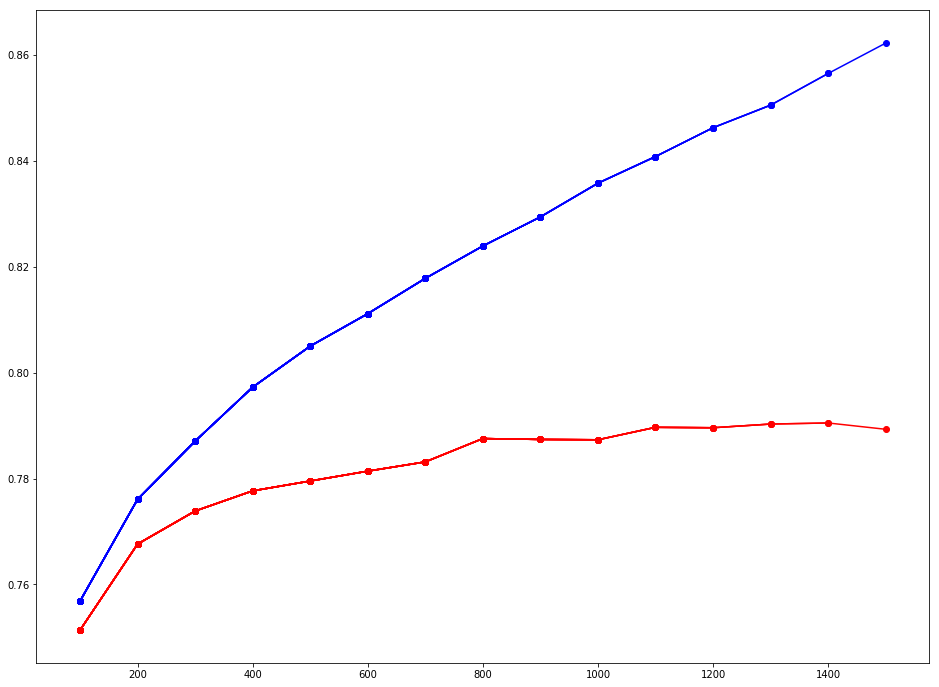

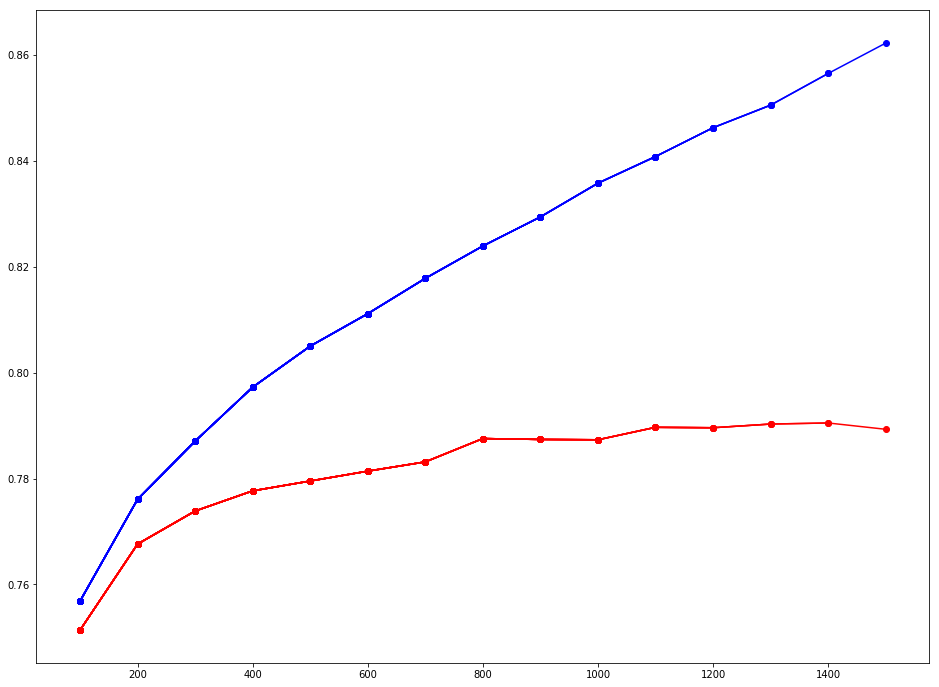

In [21]:
score_train = []
score_val = []
score_iter = []
iters = 100
iter_step = 100
while iters < 1501:
    model = catboost.CatBoostClassifier(loss_function='Logloss',
                                    #custom_loss=['MCC','BalancedAccuracy'],
                                    #leaf_estimation_method = 'Newton',
                                    l2_leaf_reg=20,
                                    border_count=200,
                                    #early_stopping_rounds=True, 
                                    #eval_metric='BalancedAccuracy',
                                    max_depth=5,
                                    bootstrap_type='No', 
                                    random_strength=0, 
                                    iterations=iters, 
                                    learning_rate=0.05, 
                                    verbose=False,
                                    thread_count=4, 
                                    task_type='GPU', 
                                    random_state=12,
                                    rsm=1,
)
    model.fit(train_concat.loc[:val_split_index],
          labels[:val_split_index+1],
          sample_weight=abs_weights[:val_split_index+1],
          #plot=True,
          save_snapshot=True,
          snapshot_file='snapshot22.file'
          #baseline=baseline,
          #cat_features=cat_features,
          #eval_set=(train_concat.loc[val_split_index:].values, labels[val_split_index:].values),
          #early_stopping_rounds=100,
          #use_best_model=True,
)
#check overfit train
    validation_predictions = model.predict_proba(train_concat.loc[:val_split_index].values)[:, 1]
    score = scoring.rejection90(labels[:val_split_index+1].values, validation_predictions, sample_weight=weights[:val_split_index+1].values)
    validation_predictions = model.predict_proba(train_concat.loc[val_split_index:].values)[:, 1]
    score2=scoring.rejection90(labels[val_split_index:].values, validation_predictions, sample_weight=weights[val_split_index:].values)
    score_train.append(score)
    score_val.append(score2)
    score_iter.append(iters)
    pl.plot(score_iter, score_train, "b",)
    pl.scatter(score_iter,score_train,c='b')
    pl.plot(score_iter, score_val, "r",)
    pl.scatter(score_iter,score_val,c='r')
    
    display.clear_output(wait=True)
    display.display(pl.gcf())
    
    #print(iters,score_train,score_val)
    iters += iter_step

In [62]:
with open('backup.pkl','rb') as fin:
    backup = pickle.load(fin)
    
index = len(backup)
backup[index]['train'] = score_train.copy()
backup[index]['val'] = score_val.copy()
backup[index]['iter'] = score_iter.copy()
backup[index]['title'] = 'GPU +0-7/dxy^2 -0-23'

with open('backup.pkl','wb') as fin:
    pickle.dump(backup,fin,pickle.HIGHEST_PROTOCOL)

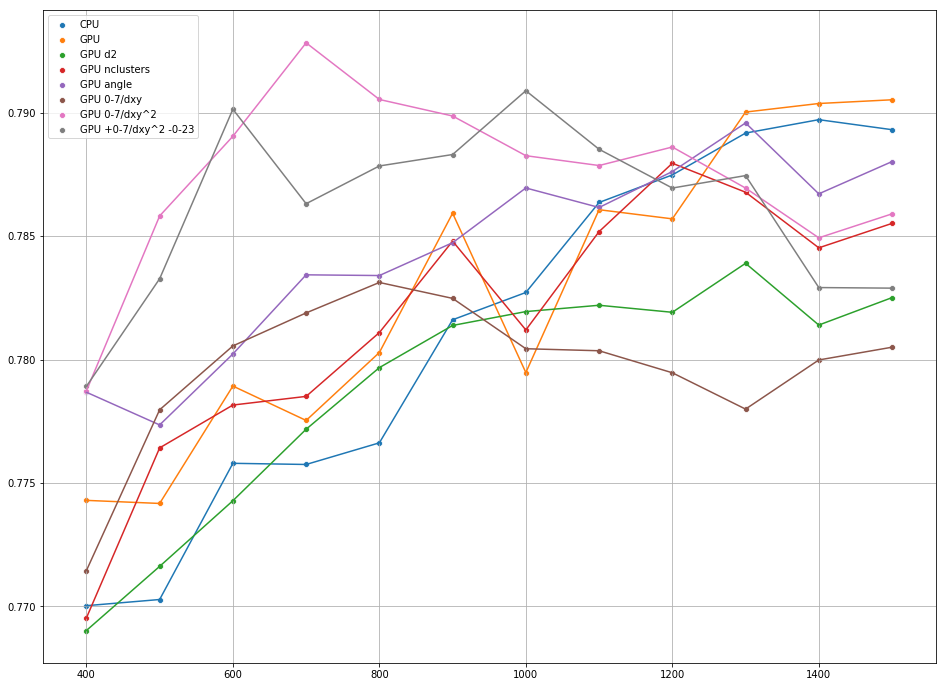

In [64]:
plt.grid(True)
for i in range(20,len(backup)):
    sns.scatterplot(backup[i]['iter'][3:],backup[i]['val'][3:],label=backup[i]['title'])
    pl.plot(backup[i]['iter'][3:],backup[i]['val'][3:])
plt.show()

In [28]:
score_val

[0.7404429737375208,
 0.7548437820165583,
 0.7622354565555655,
 0.7690266519116511,
 0.7716238014504508,
 0.7742823262236818,
 0.7771765116364403,
 0.7796715340027957,
 0.7813793752166384,
 0.7819408250570912,
 0.7821970479013476,
 0.7819121150567977,
 0.7838954168097975,
 0.7813962028363844,
 0.7825064750190082]

In [21]:
score_val

[0.7345559855757603,
 0.7606687585566094,
 0.7705462914263848,
 0.7742965463113246,
 0.7741719209585266,
 0.7789254462713043,
 0.7775326110543735,
 0.7802836451142646,
 0.785924035650718,
 0.7794716487739215,
 0.7860661891380621,
 0.7856956233706758,
 0.7900202614723072,
 0.7903667402628598,
 0.7905175264408487]

In [24]:
validation_predictions2 = model.predict_proba(train_concat.values)[:, 1]

In [25]:
train_concat['weight'] = weights
train_concat['label'] = labels
train_concat['pred'] = validation_predictions2

In [26]:
train_concat['diff'] = abs(train_concat['label'] - train_concat['pred'])

In [27]:
closest_hits_features.loc[[772660,2199526],:]

0             1            2             3             4  \
772660   16.848860  35984.078125  9015.041016   4359.980957  77934.023438   
2199526  67.598022     24.395786  6955.238281  51433.941406   2423.159912   

                   5             6              7    8     9   10    11  \
772660   1960.872314  19492.878906    8424.106445  5.0  12.0  6.0  10.0   
2199526  2810.098389  25942.765625  519552.343750  8.0   2.0  9.0   6.0   

                   12            13            14            15        16  \
772660   15319.550781  16405.861328  17514.960938  18806.845703  3.208333   
2199526  15321.793945  16529.156250  17522.191406  18875.658203  6.375000   

             17    18         19          20         21         22          23  
772660   20.750  29.5  15.833333  126.278549  16.929256  36.479130   19.429239  
2199526   6.875  59.0  80.000000   31.479162  33.979145  73.078896  304.680542

In [28]:
train_concat.loc[[772660,2199526],:]

ncl[0]  ncl[1]  ncl[2]  ncl[3]  avg_cs[0]  avg_cs[1]  avg_cs[2]  \
id                                                                         
772660      122      43      19      50   3.401639   2.511628   1.789474   
2199526      42      21       1       6   3.023809   1.809524   1.000000   

         avg_cs[3]  ndof  MatchedHit_TYPE[0]  MatchedHit_TYPE[1]  \
id                                                                 
772660        1.94     8                   1                   1   
2199526       1.00     8                   2                   2   

         MatchedHit_TYPE[2]  MatchedHit_TYPE[3]  MatchedHit_X[0]  \
id                                                                 
772660                    2                   1      -539.671692   
2199526                   2                   1      1157.324951   

         MatchedHit_X[1]  MatchedHit_X[2]  MatchedHit_X[3]  MatchedHit_Y[0]  \
id                                                                            
772660       -396.049988      -730.869995      -588.403320       125.052376   
2199526      1275.185059      1450.599976      1694.819946       220.334915   

         MatchedHit_Y[1]  MatchedHit_Y[2]  MatchedHit_Y[3]  MatchedHit_Z[0]  \
id                                                                            
772660       -121.879822       -38.591953       -98.473221     15319.550781   
2199526       237.588516       359.114594       932.315674     15321.793945   

         MatchedHit_Z[1]  MatchedHit_Z[2]  MatchedHit_Z[3]  MatchedHit_DX[0]  \
id                                                                             
772660      16405.861328     17514.960938     18806.845703          3.208333   
2199526     16529.156250     17522.191406     18875.658203          6.375000   

         MatchedHit_DX[1]  MatchedHit_DX[2]  MatchedHit_DX[3]  \
id                                                              
772660             20.750              29.5         15.833333   
2199526             6.875              59.0         80.000000   

         MatchedHit_DY[0]  MatchedHit_DY[1]  MatchedHit_DY[2]  \
id                                                              
772660         126.278549         16.929256         36.479130   
2199526         31.479162         33.979145         73.078896   

         MatchedHit_DY[3]  MatchedHit_DZ[0]  MatchedHit_DZ[1]  \
id                                                              
772660          19.429239         33.954948         33.561180   
2199526        304.680542         33.613575         33.622578   

         MatchedHit_DZ[2]  MatchedHit_DZ[3]  MatchedHit_T[0]  MatchedHit_T[1]  \
id                                                                              
772660          33.631580         33.570183                5               12   
2199526         33.763374        176.029510                8                7   

         MatchedHit_T[2]  MatchedHit_T[3]  MatchedHit_DT[0]  MatchedHit_DT[1]  \
id                                                                              
772660                 6               11                 5                12   
2199526                9                6                 1                -8   

         MatchedHit_DT[2]  MatchedHit_DT[3]  Lextra_X[0]  Lextra_X[1]  \
id                                                                      
772660                  2                11  -535.566956  -585.744690   
2199526                 0                 6  1165.546753  1266.374268   

         Lextra_X[2]  Lextra_X[3]  Lextra_Y[0]  Lextra_Y[1]  Lextra_Y[2]  \
id                                                                         
772660   -635.922424  -686.100159  -154.114273  -166.161560  -178.208847   
2199526  1367.201904  1468.029419   171.109314   184.578156   198.047012   

         Lextra_Y[3]  NShared  Mextra_DX2[0]  Mextra_DX2[1]  Mextra_DX2[2]  \
id                                                                           
772660   -190.25

In [19]:
indexes_good = np.argsort(abs_diff)

In [20]:
indexes_bad = indexes_good[::-1]

In [21]:
train_concat['diff'] = 0

In [22]:
train_concat.loc[2000000:,'diff'] = abs_diff

In [23]:
train_concat['pred'] = -1

In [24]:
train_concat.loc[2000000:,'pred'] = validation_predictions

In [25]:
train_concat['weights'] = weights
train_concat['labels'] = labels

In [29]:
columns = ['labels','diff','pred','weights']

In [39]:
full_train.loc[[2438535,2717258],:]

ncl[0]  ncl[1]  ncl[2]  ncl[3]  avg_cs[0]  avg_cs[1]  avg_cs[2]  \
id                                                                         
2438535     155      56      22      26   4.258065   2.678571   1.727273   
2717258     155      56      22      26   4.258065   2.678571   1.727273   

         avg_cs[3]  ndof  MatchedHit_TYPE[0]  MatchedHit_TYPE[1]  \
id                                                                 
2438535   1.615385     8                   2                   1   
2717258   1.615385     8                   2                   1   

         MatchedHit_TYPE[2]  MatchedHit_TYPE[3]  MatchedHit_X[0]  \
id                                                                 
2438535                   1                   1       448.725006   
2717258                   1                   1       448.725006   

         MatchedHit_X[1]  MatchedHit_X[2]  MatchedHit_X[3]  MatchedHit_Y[0]  \
id                                                                            
2438535       738.809998       575.900024       466.886658       -47.959538   
2717258       738.809998       575.900024       466.886658       -47.959538   

         MatchedHit_Y[1]  MatchedHit_Y[2]  MatchedHit_Y[3]  MatchedHit_Z[0]  \
id                                                                            
2438535      -103.407951       -55.782726        57.468201     15119.826172   
2717258      -103.407951       -55.782726        57.468201     15119.826172   

         MatchedHit_Z[1]  MatchedHit_Z[2]  MatchedHit_Z[3]  MatchedHit_DX[0]  \
id                                                                             
2438535     16410.927734     17520.697266     19015.007812          3.208333   
2717258     16410.927734     17520.697266     19015.007812          3.208333   

         MatchedHit_DX[1]  MatchedHit_DX[2]  MatchedHit_DX[3]  \
id                                                              
2438535              82.5         14.833333         15.833333   
2717258              82.5         14.833333         15.833333   

         MatchedHit_DY[0]  MatchedHit_DY[1]  MatchedHit_DY[2]  \
id                                                              
2438535         15.679264         33.979145         18.179249   
2717258         15.679264         33.979145         18.179249   

         MatchedHit_DY[3]  MatchedHit_DZ[0]  MatchedHit_DZ[1]  \
id                                                              
2438535         19.429239         33.556679         33.622578   
2717258         19.429239         33.556679         33.622578   

         MatchedHit_DZ[2]  MatchedHit_DZ[3]  MatchedHit_T[0]  MatchedHit_T[1]  \
id                                                                              
2438535         33.565681         33.570183               11               13   
2717258         33.565681         33.570183               11               13   

         MatchedHit_T[2]  MatchedHit_T[3]  MatchedHit_DT[0]  MatchedHit_DT[1]  \
id                                                                              
2438535                5                8                 7                13   
2717258                5                8                 7                13   

         MatchedHit_DT[2]  MatchedHit_DT[3]  Lextra_X[0]  Lextra_X[1]  \
id                                                                      
2438535                 5                 8   430.050232   469.189178   
2717258                 5                 8   430.050232   469.189178   

         Lextra_X[2]  Lextra_X[3]  Lextra_Y[0]  Lextra_Y[1]  Lextra_Y[2]  \
id                                                                         
2438535   508.328125   547.467041   -24.888363   -26.804211   -28.720058   
2717258   508.328125   547.467041   -24.888363   -26.804211   -28.720058   

         Lextra_Y[3]  NShared  Mextra_DX2[0]  Mextra_DX2[1]  Mextra_DX2[2]  \
id                                                                           
2438535   -30.63

In [38]:
train_concat.loc[[2438535,2717258],:]

ncl[0]  ncl[1]  ncl[2]  ncl[3]  avg_cs[0]  avg_cs[1]  avg_cs[2]  \
id                                                                         
2438535     155      56      22      26   4.258065   2.678571   1.727273   
2717258     155      56      22      26   4.258065   2.678571   1.727273   

         avg_cs[3]  ndof  MatchedHit_TYPE[0]  MatchedHit_TYPE[1]  \
id                                                                 
2438535   1.615385     8                   2                   1   
2717258   1.615385     8                   2                   1   

         MatchedHit_TYPE[2]  MatchedHit_TYPE[3]  MatchedHit_X[0]  \
id                                                                 
2438535                   1                   1       448.725006   
2717258                   1                   1       448.725006   

         MatchedHit_X[1]  MatchedHit_X[2]  MatchedHit_X[3]  MatchedHit_Y[0]  \
id                                                                            
2438535       738.809998       575.900024       466.886658       -47.959538   
2717258       738.809998       575.900024       466.886658       -47.959538   

         MatchedHit_Y[1]  MatchedHit_Y[2]  MatchedHit_Y[3]  MatchedHit_Z[0]  \
id                                                                            
2438535      -103.407951       -55.782726        57.468201     15119.826172   
2717258      -103.407951       -55.782726        57.468201     15119.826172   

         MatchedHit_Z[1]  MatchedHit_Z[2]  MatchedHit_Z[3]  MatchedHit_DX[0]  \
id                                                                             
2438535     16410.927734     17520.697266     19015.007812          3.208333   
2717258     16410.927734     17520.697266     19015.007812          3.208333   

         MatchedHit_DX[1]  MatchedHit_DX[2]  MatchedHit_DX[3]  \
id                                                              
2438535              82.5         14.833333         15.833333   
2717258              82.5         14.833333         15.833333   

         MatchedHit_DY[0]  MatchedHit_DY[1]  MatchedHit_DY[2]  \
id                                                              
2438535         15.679264         33.979145         18.179249   
2717258         15.679264         33.979145         18.179249   

         MatchedHit_DY[3]  MatchedHit_DZ[0]  MatchedHit_DZ[1]  \
id                                                              
2438535         19.429239         33.556679         33.622578   
2717258         19.429239         33.556679         33.622578   

         MatchedHit_DZ[2]  MatchedHit_DZ[3]  MatchedHit_T[0]  MatchedHit_T[1]  \
id                                                                              
2438535         33.565681         33.570183               11               13   
2717258         33.565681         33.570183               11               13   

         MatchedHit_T[2]  MatchedHit_T[3]  MatchedHit_DT[0]  MatchedHit_DT[1]  \
id                                                                              
2438535                5                8                 7                13   
2717258                5                8                 7                13   

         MatchedHit_DT[2]  MatchedHit_DT[3]  Lextra_X[0]  Lextra_X[1]  \
id                                                                      
2438535                 5                 8   430.050232   469.189178   
2717258                 5                 8   430.050232   469.189178   

         Lextra_X[2]  Lextra_X[3]  Lextra_Y[0]  Lextra_Y[1]  Lextra_Y[2]  \
id                                                                         
2438535   508.328125   547.467041   -24.888363   -26.804211   -28.720058   
2717258   508.328125   547.467041   -24.888363   -26.804211   -28.720058   

         Lextra_Y[3]  NShared  Mextra_DX2[0]  Mextra_DX2[1]  Mextra_DX2[2]  \
id                                                                           
2438535   -30.63

In [ ]:
train_concat.drop_duplicates()

In [41]:
train_good = train_concat.loc[2000000+indexes_good,:].head(100)

In [42]:
train_bad = train_concat.loc[2000000+indexes_bad,:].head(100)

In [37]:
labels_val

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [38]:
validation_predictions

array([0.94363887, 0.95287634, 0.33870881, ..., 0.90163387, 0.90073589,
       0.88041962])

In [21]:
max(score_val)

0.7867928368000902

In [128]:
#check overfit train
validation_predictions = model.predict_proba(train_concat.loc[:val_split_index].values)[:, 1]
scoring.rejection90(labels[:val_split_index+1].values, validation_predictions, sample_weight=weights[:val_split_index+1].values)

0.8618596176289711

In [129]:
#validation metric accuracy
validation_predictions = model.predict_proba(train_concat.loc[val_split_index:].values)[:, 1]
scoring.rejection90(labels[val_split_index:].values, validation_predictions, sample_weight=weights[val_split_index:].values)

0.7677721975127187

In [29]:
model.save_model('model_zeros.cbm')

In [66]:
rejection90(labels[val_split_index:].values, validation_predictions, sample_weight=weights[val_split_index:].values)

Threshold: 0.7 rejected_total: 175704


0.9203066041792868

#### reverse validation model

In [31]:
model.fit(train_concat.loc[val_split_index:], labels[val_split_index:], sample_weight=abs_weights[val_split_index:],plot=True, cat_features=cat_features)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [32]:
#for validation purpose
validation_predictions = model.predict_proba(train_concat.loc[:val_split_index-1].values)[:, 1]
scoring.rejection90(labels[:val_split_index].values, validation_predictions, sample_weight=weights[:val_split_index].values)

0.7764411427169786

#### feature importance

In [49]:
train_concat.head(3)

ncl[0]  ncl[1]  ncl[2]  ncl[3]  avg_cs[0]  avg_cs[1]  avg_cs[2]  \
id                                                                    
0       47      31      13      15       2.00   1.580645   1.153846   
1       92      19      11      26       2.75   2.789474   1.363636   
2      100      21      11      12       2.93   2.428571   1.181818   

    avg_cs[3]  ndof  MatchedHit_TYPE[0]  MatchedHit_TYPE[1]  \
id                                                            
0    1.133333     8                   2                   2   
1    1.230769     8                   2                   2   
2    1.083333     8                   2                   2   

    MatchedHit_TYPE[2]  MatchedHit_TYPE[3]  MatchedHit_X[0]  MatchedHit_X[1]  \
id                                                                             
0                    2                   2     -2685.080078     -2954.300049   
1                    2                   1       739.549988       852.510010   
2                    2                   2     -1595.130005     -1748.449951   

    MatchedHit_X[2]  MatchedHit_X[3]  MatchedHit_Y[0]  MatchedHit_Y[1]  \
id                                                                       
0      -3140.969971     -3609.169922      1373.348145      1481.262207   
1        827.000000       758.719971      2387.722168      2575.974609   
2      -1933.969971     -2066.669922      -318.644745      -344.529694   

    MatchedHit_Y[2]  MatchedHit_Y[3]  MatchedHit_Z[0]  MatchedHit_Z[1]  \
id                                                                       
0       1590.397461      1701.067627     15123.044922     16327.632812   
1       2764.196533      2952.103271     15212.597656     16420.576172   
2       -221.993256      -235.322327     15317.953125     16522.060547   

    MatchedHit_Z[2]  MatchedHit_Z[3]  MatchedHit_DX[0]  MatchedHit_DX[1]  \
id                                                                         
0      17520.826172     18729.324219             25.50             27.50   
1      17614.853516     18824.429688             25.50             27.50   
2      17598.300781     18806.351562             12.75             13.75   

    MatchedHit_DX[2]  MatchedHit_DX[3]  MatchedHit_DY[0]  MatchedHit_DY[1]  \
id                                                                           
0              118.0             126.0        126.278549        136.278488   
1              118.0             756.0        126.278549        136.278488   
2               59.0              63.0         63.078957         68.078926   

    MatchedHit_DY[2]  MatchedHit_DY[3]  MatchedHit_DZ[0]  MatchedHit_DZ[1]  \
id                                                                           
0         146.278412        156.278351         33.954948         33.990959   
1         146.278412        156.278351         33.954948         33.990959   
2          73.078896         78.078857         33.727364         33.745369   

    MatchedHit_DZ[2]  MatchedHit_DZ[3]  MatchedHit_T[0]  MatchedHit_T[1]  \
id                                                                         
0          34.026966         34.062977                3                2   
1          34.026966         34.062977                9               10   
2          33.763374         33.781380               10                3   

    MatchedHit_T[2]  MatchedHit_T[3]  MatchedHit_DT[0]  MatchedHit_DT[1]  \
id                                                                         
0                 7                5                 0                 0   
1                 8                4                 1                -1   
2                 3                5                 0                 0   

    MatchedHit_DT[2]  MatchedHit_DT[3]  Lextra_X[0]  Lextra_X[1]  Lextra_X[2]  \
id                                                                              
0                  0                 0 -2665.387939 -2917.874023 -3170.360107   
1                  0 

In [38]:
a = dict()
for index, value in enumerate(model.feature_importances_):
    print(train_concat.columns[index], value)
    a[train_concat.columns[index]] = value

ncl[0] 0.7841470515217661
ncl[1] 1.0750125613457708
ncl[2] 1.836628742543331
ncl[3] 0.9435764224968809
avg_cs[0] 0.5142120615239085
avg_cs[1] 0.6866801058271752
avg_cs[2] 0.562429124422542
avg_cs[3] 0.5387849398421469
ndof 0.5706529842457793
MatchedHit_TYPE[0] 1.290298981858996
MatchedHit_TYPE[1] 2.8173193378175743
MatchedHit_TYPE[2] 0.3694208063288261
MatchedHit_TYPE[3] 0.4081476124813521
MatchedHit_X[0] 0.2248210087592213
MatchedHit_X[1] 0.21418856132915826
MatchedHit_X[2] 0.23918135886193714
MatchedHit_X[3] 0.28058630320352984
MatchedHit_Y[0] 0.44484443588132155
MatchedHit_Y[1] 0.43881984219238146
MatchedHit_Y[2] 0.3818953221775577
MatchedHit_Y[3] 0.47964650790784785
MatchedHit_Z[0] 0.3416325946988902
MatchedHit_Z[1] 0.23191643757904004
MatchedHit_Z[2] 0.11524602307176748
MatchedHit_Z[3] 0.17405281577554774
MatchedHit_DX[0] 0.008960719590759739
MatchedHit_DX[1] 0.08838180278520111
MatchedHit_DX[2] 0.05678716217123429
MatchedHit_DX[3] 0.4355816923493879
MatchedHit_DY[0] 0.01894385429

#### save model

In [37]:
model.save_model("7702_35k_plastina_arr_angle_fina_velocity.cbm")

In [13]:
model = catboost.CatBoostClassifier(loss_function='Logloss',
                                    #custom_loss=['MCC','BalancedAccuracy'],
                                    #leaf_estimation_method = 'Newton',
                                    l2_leaf_reg=20,
                                    border_count=200,
                                    #early_stopping_rounds=True, 
                                    #eval_metric='BalancedAccuracy',
                                    max_depth=5,
                                    #feature_border_type='MinEntropy',
                                    bootstrap_type='No', 
                                    random_strength=0, 
                                    iterations=3000, 
                                    learning_rate=0.05, 
                                    verbose=False,
                                    thread_count=4, 
                                    #task_type='GPU', 
                                    random_state=12,
                                    rsm=1,
)


In [14]:
model.load_model('7673_3k_plastina_arr_angle_fina.cbm')

## prediction submit

In [35]:
predictions = model.predict_proba(train_concat.values)[:, 1]

In [36]:
pd.DataFrame(data={"prediction": predictions}, index=full_train.index).to_csv(
    "sample_submission_1039.csv", index_label="id")

### look at data

(array([152790.,  48085.,  64409., 108029., 184992., 297420., 404958.,
        441259., 472456., 548455.]),
 array([1.77215503e-06, 9.99915322e-02, 1.99981292e-01, 2.99971052e-01,
        3.99960812e-01, 4.99950572e-01, 5.99940333e-01, 6.99930093e-01,
        7.99919853e-01, 8.99909613e-01, 9.99899373e-01]),
 <a list of 10 Patch objects>)

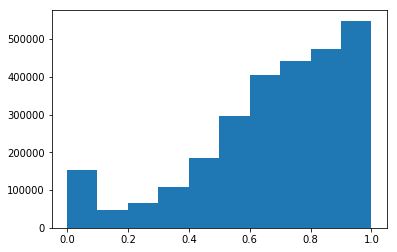

In [66]:
plt.hist(validation_predictions)

(array([ 50396.,  31101.,  54049.,  98373., 174231., 285162., 391713.,
        428392., 459624., 538997.]),
 array([1.23490739e-05, 1.00001051e-01, 1.99989754e-01, 2.99978456e-01,
        3.99967159e-01, 4.99955861e-01, 5.99944563e-01, 6.99933266e-01,
        7.99921968e-01, 8.99910670e-01, 9.99899373e-01]),
 <a list of 10 Patch objects>)

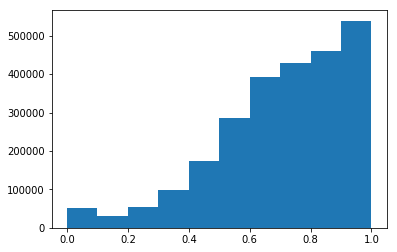

In [65]:
plt.hist(backup)

In [14]:
from collections import Counter

In [15]:
full_train.columns

Index(['ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 'avg_cs[1]',
       'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_TYPE[0]',
       'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]',
       'MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]',
       'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]',
       'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]',
       'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]',
       'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]',
       'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]',
       'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]',
       'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]',
       'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]',
       'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]',
       'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'Lextra_X[0]', 'Lextra_X[1]',
       'Lextra_X[2]', 'Lextra_X[3]', 'Lextra_Y[0]', 'Lextra_

In [36]:
train = full_train[(full_train.label==1)&(full_train['MatchedHit_X[2]']!=-9999)][:100]

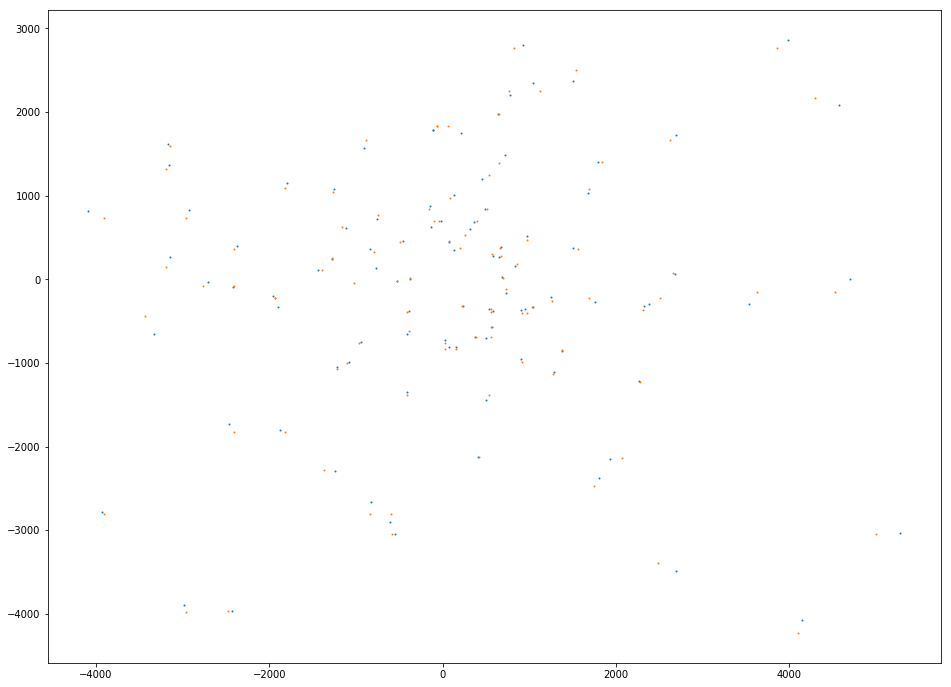

In [37]:
plt.scatter('Lextra_X[2]','Lextra_Y[2]',data=train,s=1)
plt.scatter('MatchedHit_X[2]','MatchedHit_Y[2]',data=train,s=1)
plt.show()

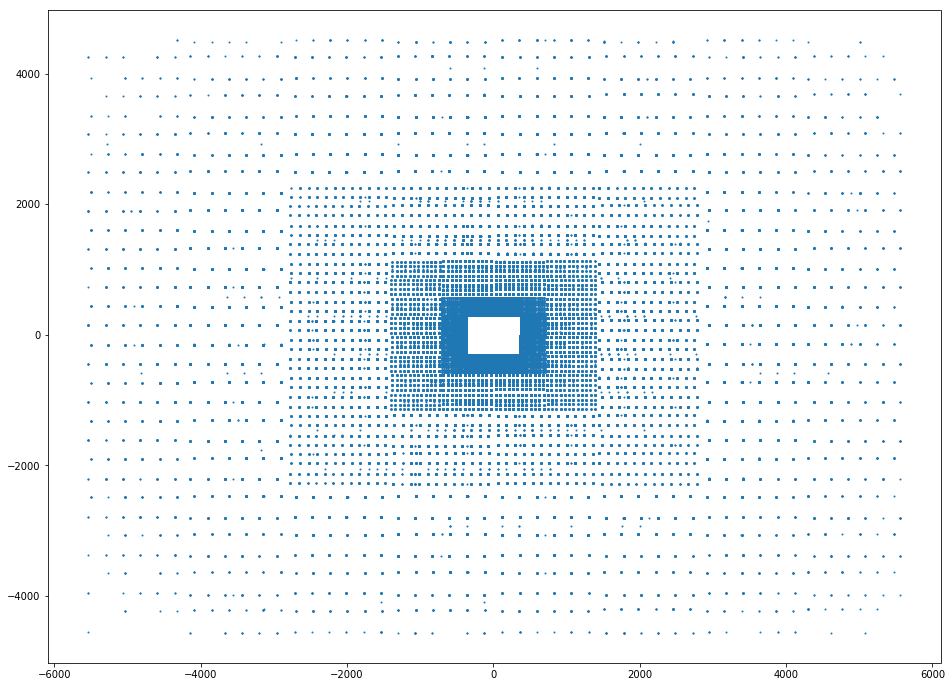

In [24]:
plt.scatter('MatchedHit_X[2]','MatchedHit_Y[2]',data=train,s=1)

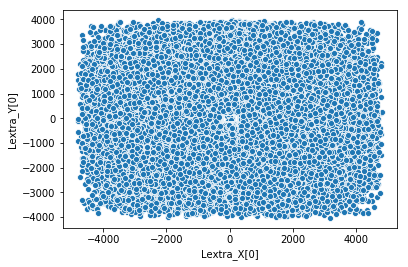

In [27]:
sns.scatterplot('Lextra_X[0]','Lextra_Y[0]',data=train,)

In [1]:
full_train2[((full_train2.weight>5)&(full_train2.weight<100))&(full_train2.label==0)]['weight'].hist(bins=70)

NameError: name 'full_train2' is not defined

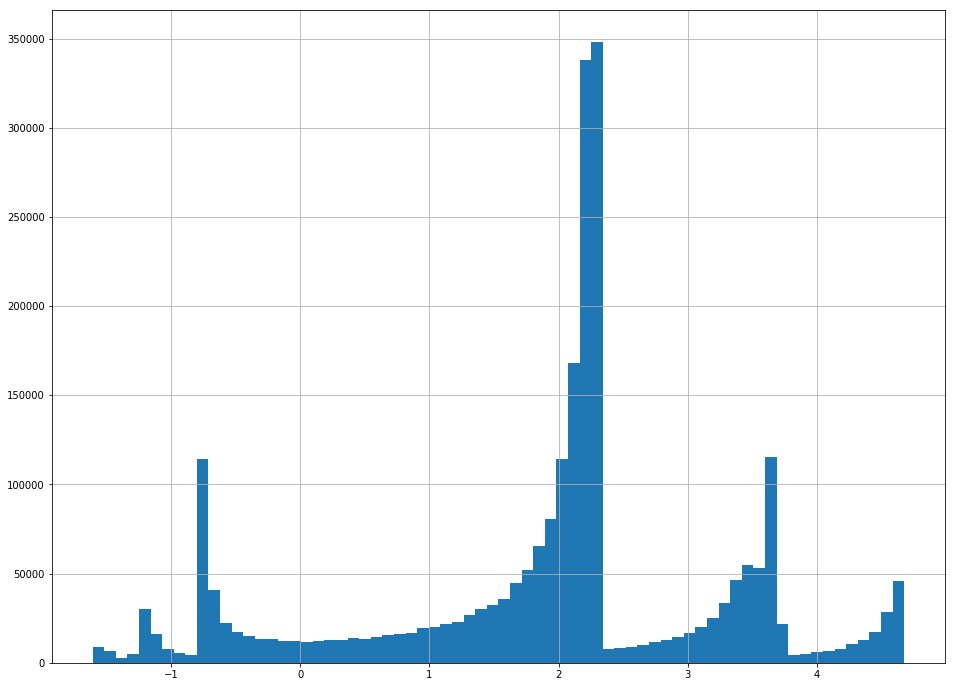

In [66]:
full_train[(full_train.weight<=5)&(full_train.weight>-2)&(full_train.label==1)]['weight'].hist(bins=70)

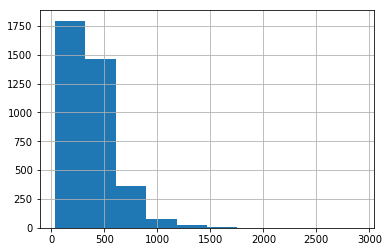

In [16]:
full_train[full_train.weight<-100]['kinWeight'].hist()

In [142]:
full_train.columns

Index(['ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 'avg_cs[1]',
       'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_TYPE[0]',
       'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]',
       'MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]',
       'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]',
       'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]',
       'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]',
       'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]',
       'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]',
       'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]',
       'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]',
       'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]',
       'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]',
       'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'Lextra_X[0]', 'Lextra_X[1]',
       'Lextra_X[2]', 'Lextra_X[3]', 'Lextra_Y[0]', 'Lextra_

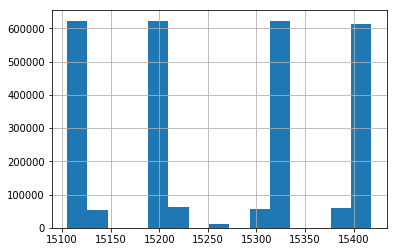

In [199]:
def wrapper(x):
    return x
    return np.log(x)
full_train['MatchedHit_Z[0]'].apply(wrapper).hist(bins=15)

inf

#### fixed 1000 into -9999 | 99999 as inf

In [32]:
columns = [str(i) for i in range(24)]

In [33]:
for column in columns:
    train_concat[column] = train_concat[column].apply(lambda x: 99999 if x ==np.inf else x)

In [37]:
for column in columns:
    train_concat[column] = train_concat[column].apply(lambda x: 9999 if x == 1000 else x)

#### predict weights

In [38]:
model = catboost.CatBoostRegressor(learning_rate=0.5, bootstrap_type='No', iterations=200, max_depth=6, thread_count=4, verbose=False, task_type='GPU', random_seed=0)

In [104]:
val_split_index

2722852

In [119]:
train_concat.loc[:2000000].shape

(2000001, 94)

In [120]:
len(train_concat, len(weights[:val_split_index+1])

(2722853, 2722853)

In [39]:
model.fit(train_concat, weights, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [45]:
validation_predictions = model.predict(train_concat.values)

In [123]:
from sklearn.metrics import mean_squared_error

In [28]:
per_min, per_max = np.percentile(weights,[1,99])

In [29]:
per_min, per_max

(-3.831022285897888, 46.38987887292503)

In [30]:
mask = (weights>per_min)&(weights<per_max)

In [31]:
train_concat = train_concat.loc[mask,:]

In [32]:
train_concat.index = range(train_concat.shape[0])

In [33]:
weights = weights[mask]

In [34]:
weights = list(weights)

In [35]:
train_concat.shape

(5336789, 94)

In [36]:
len(weights)

5336789

In [ ]:
#10 баллов гриффиндору за любопытство

In [124]:
mean_squared_error([0]*len(weights[val_split_index:]), weights[val_split_index:])

18.768884461090362

In [125]:
mean_squared_error(validation_predictions, weights[val_split_index:])

11.4444077889796

In [127]:
validation_predictions[:20], weights[val_split_index:][:20]

(array([1.80216479, 2.97675693, 2.13302169, 2.02227293, 1.71427621,
        1.84824229, 2.47684735, 2.33296631, 2.4425276 , 1.51247682,
        2.10281472, 2.16364124, 2.31968142, 2.46712659, 2.10889567,
        3.01095569, 1.76840565, 1.54138615, 1.87915287, 2.35448005]),
 [2.4454472301703425,
  2.1353175229368198,
  3.6305999890254683,
  2.1965105353080507,
  1.56802000452692,
  1.1953754294527543,
  2.256652606190843,
  3.3296491754457183,
  1.9795028423540109,
  3.1859365612235298,
  2.002569296063854,
  -0.6906244847600614,
  2.2572989995892074,
  2.2496932995629004,
  2.2079503623164403,
  4.4165564758648985,
  2.1863833020682883,
  4.488018185739937,
  0.7514074581596734,
  3.702935824804233])

In [85]:
ind_todrop=[2405082,249197, 1174610,249197, 999278, 1006092,1293584,1174610, 1317515, 1457094,588827, 1174610, 1317515]

In [86]:
train_concat.loc[ind_todrop,:]

ncl[0]  ncl[1]  ncl[2]  ncl[3]  avg_cs[0]  avg_cs[1]  avg_cs[2]  \
id                                                                         
2405082     136      83      13      15   5.544117   5.759036   2.538461   
249197      132      22      16      18   3.151515   2.500000   1.750000   
1174610      91       7       2       9   4.010989   2.000000   1.500000   
249197      132      22      16      18   3.151515   2.500000   1.750000   
999278      103       8       9       5   3.000000   1.875000   1.111111   
1006092      58      16      12      15   4.741379   1.562500   1.250000   
1293584      43      31      10      11   2.883721   2.709677   1.100000   
1174610      91       7       2       9   4.010989   2.000000   1.500000   
1317515      68      31      25      16   3.470588   6.354839   1.640000   
1457094      84      11       8       7   4.273809   1.545455   1.125000   
588827      154      29      14      25   5.032467   3.034483   1.285714   
1174610      91       7       2       9   4.010989   2.000000   1.500000   
1317515      68      31      25      16   3.470588   6.354839   1.640000   

         avg_cs[3]  ndof  MatchedHit_TYPE[0]  MatchedHit_TYPE[1]  \
id                                                                 
2405082   1.866667     8                   2                   2   
249197    1.500000     8                   2                   2   
1174610   1.000000     8                   2                   2   
249197    1.500000     8                   2                   2   
999278    1.200000     8                   2                   2   
1006092   1.400000     8                   2                   2   
1293584   1.090909     8                   2                   2   
1174610   1.000000     8                   2                   2   
1317515   1.125000     8                   2                   2   
1457094   1.285714     8                   2                   2   
588827    1.320000     8                   2                   2   
1174610   1.000000     8                   2                   2   
1317515   1.125000     8                   2                   2   

         MatchedHit_TYPE[2]  MatchedHit_TYPE[3]  MatchedHit_X[0]  \
id                                                                 
2405082                   1                   1       429.475006   
249197                    2                   2     -1300.831177   
1174610                   1                   1      -239.288330   
249197                    2                   2     -1300.831177   
999278                    2                   1      1263.599976   
1006092                   2                   2       927.825012   
1293584                   2                   2       212.324997   
1174610                   1                   1      -239.288330   
1317515                   1                   2       239.758331   
1457094                   2                   2      2672.449951   
588827                    1                   1       405.891663   
1174610                   1                   1      -239.288330   
1317515                   1                   2       239.758331   

         MatchedHit_X[1]  MatchedHit_X[2]  MatchedHit_X[3]  MatchedHit_Y[0]  \
id                                                                            
2405082       463.285004       486.899994       521.619995      -142.758926   
249197      -1445.949951     -1475.869995     -1576.670044      -192.686188   
1174610      -259.058319      -288.003326      -308.503326       388.654480   
249197      -1445.949951     -1475.869995     -1576.670044      -192.686188   
999278       1364.060059      1450.599976      1866.819946       936.734070   
1006092      1000.184998      1095.599976      1171.219971        93.935738   
1293584       215.134995       209.600006       225.520004      -532.356384   
1174610      -259.058319      -288.003326      -308.503326       388.654480   
1317515       258.168335       259.0

In [44]:
y_train = train_concat['weights']

In [45]:
train_concat.drop(columns='weights',inplace=True)

In [46]:
model = catboost.CatBoostClassifier(learning_rate=0.3, bootstrap_type='No', iterations=200, max_depth=5, thread_count=4, verbose=False, task_type='GPU', random_seed=0)

In [47]:
model.fit(train_concat, y_train, sample_weight=abs_weights,plot=True, cat_features=cat_features)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [54]:
validation_predictions = model.predict(train_concat.values)

In [59]:
sum(validation_predictions[validation_predictions!=1])

0.0

In [34]:
#for validation purpose
validation_predictions = model.predict_proba(train_concat.loc[val_split_index:].values)[:, 1]
scoring.rejection90(labels[val_split_index:].values, validation_predictions, sample_weight=weights[val_split_index:].values)

0.997600034800479

In [ ]:
b

In [71]:
train = train_bad

In [66]:
train = train[train.labels==0]

In [63]:
train = train[(train.labels==0)&(train['MatchedHit_X[2]']!=-9999)&(train['MatchedHit_X[3]']!=-9999)]

In [33]:
full_train.loc[index]['label']

id
55    1
56    1
57    1
90    1
Name: label, dtype: int8

In [75]:
full_train.loc[:,utils.SIMPLE_FEATURE_COLUMNS].shape

(2722852, 65)

In [ ]:
full_train.drop_duplicates

In [79]:
ind = full_train.loc[:,utils.SIMPLE_FEATURE_COLUMNS].drop_duplicates().index

In [80]:
dub_indexes = set(list(range(full_train.shape[0]))) - set(ind)

In [82]:
dub_indexes = list(dub_indexes)

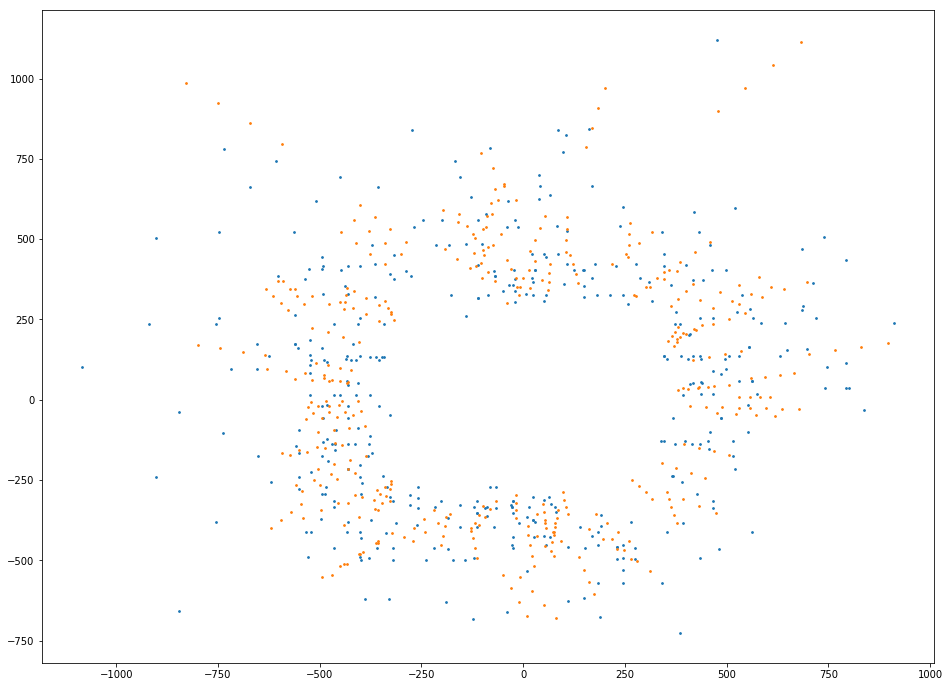

In [72]:
x = []
y = []
for i in range(4):
    x.append(train[f'MatchedHit_X[{i}]'])
    y.append(train[f'MatchedHit_Y[{i}]'])
plt.scatter(x,y,s=3)
x = []
y = []
for i in range(4):
    x.append(train[f'Lextra_X[{i}]'])
    y.append(train[f'Lextra_Y[{i}]'])
plt.scatter(x,y,s=3)
plt.show()

In [15]:
import itertools as it
full_train['m_0_xy']=full_train['MatchedHit_X[0]'].astype(str)+' '+full_train["MatchedHit_Y[0]"].astype(str)
station_0=list(full_train['m_0_xy'].unique())
iter_station=iter(station_0)
n=len(station_0)
x=[]
y=[]
stop_ind=0
while stop_ind<n:
    stop_ind+=1
    coor=iter_station.__next__()
    x.append(np.float(coor.split(' ')[0]))
    y.append(np.float(coor.split(' ')[1]))

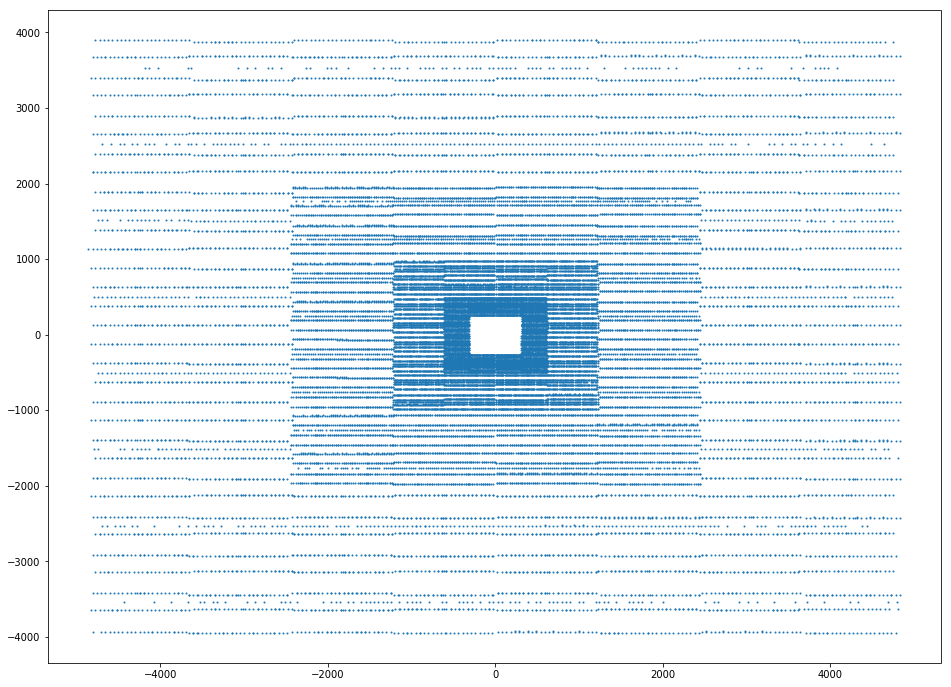

In [16]:
plt.scatter(x,y, s=1)

In [ ]:
plt.scatter('Lextra_X[2]','Lextra_Y[2]',data=train,s=1)
plt.scatter('MatchedHit_X[2]','MatchedHit_Y[2]',data=train,s=1)
plt.show()